# K-Means (Метод k-средних)

Преимущества:
- Очень быстрый и масштабируемый на больших наборах данных.
- Прост в понимании и реализации.

Недостатки:
- Необходимо заранее задать количество кластеров (k).
- Чувствителен к начальному выбору центроидов (решается запуском алгоритма - несколько раз с разными начальными точками — n_init в sklearn).
- Предполагает, что кластеры имеют сферическую форму и примерно одинаковый размер. Плохо работает на кластерах сложной формы.
- Чувствителен к выбросам.

Когда использовать: Когда у вас есть предположение о количестве кластеров, и вы ожидаете, что они будут иметь компактную, шарообразную форму. Отлично подходит в качестве базовой модели (baseline) из-за своей скорости.

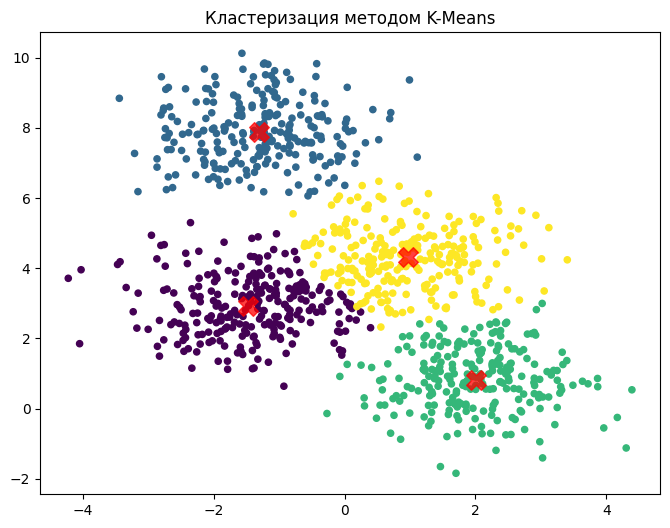

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# генерируем данные для демонстрации
# make_blobs создает как раз такие "круглые" кластеры, для которых K-Means идеален
x, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.9, random_state=0)

# создаем и обучаем модель
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
y_kmeans = kmeans.fit_predict(x)

# визуализируем результат
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Кластеризация методом K-Means')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Алгоритм, основанный на плотности. Он группирует вместе точки, которые плотно расположены, отмечая как выбросы точки, которые лежат в областях с низкой плотностью.

Как работает: Алгоритм "выращивает" кластеры из ядерных точек. Точка является ядерной, если в радиусе eps от нее находится не менее min_samples других точек. Кластер — это совокупность ядерных точек и достижимых из них граничных точек. Точки, которые не являются ни ядерными, ни граничными, считаются шумом (выбросами).

Преимущества:
- Не требует заранее указывать количество кластеров.
- Способен находить кластеры произвольной формы (не только сферические).
- Устойчив к выбросам и умеет их идентифицировать.

Недостатки:
- Производительность ниже, чем у K-Means на больших данных.
- Результат очень чувствителен к двум параметрам: eps (радиус окружности) и min_samples (минимальное число точек). Их подбор может быть нетривиальной задачей.
- Плохо справляется с кластерами разной плотности.

Когда использовать: Когда ваши данные содержат шум/выбросы, а кластеры могут иметь сложную, невыпуклую форму (например, геопространственные данные, "полумесяцы").

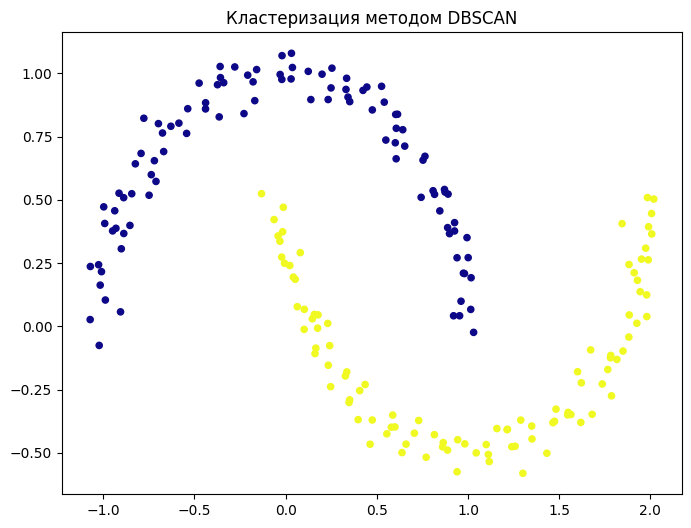

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# генерируем данные сложной формы, где K-Means бы провалился
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# создаем и обучаем модель
# параметры eps и min_samples нужно подбирать под данные
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(x)

# визуализируем результат
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, s=20, cmap='plasma')
plt.title('Кластеризация методом DBSCAN')
plt.show()

# Agglomerative Clustering (Агломеративная иерархическая кластеризация)
Этот метод строит иерархию кластеров.

Как работает: Начинается с того, что каждая точка данных является отдельным кластером. Затем на каждом шаге два самых близких кластера объединяются в один. Процесс продолжается до тех пор, пока все точки не окажутся в одном большом кластере. Результат можно представить в виде дерева (дендрограммы), которое можно "обрезать" на любом уровне, чтобы получить нужное количество кластеров.

Преимущества:
- Не требует заранее задавать количество кластеров (можно выбрать позже, анализируя дендрограмму).
- Визуализация в виде дендрограммы очень полезна для понимания структуры данных.
- Может работать с разными метриками расстояния (linkage: ward, complete, average).

Недостатки:
- Вычислительно сложен (обычно O(n²)), что делает его неприменимым для очень больших наборов данных.
- Принятые на ранних этапах решения об объединении нельзя отменить.

Когда использовать: Когда важна иерархическая структура данных (например, в биологии для таксономии видов, в генеалогии). Хорошо подходит для небольших и средних наборов данных, где важна интерпретируемость.

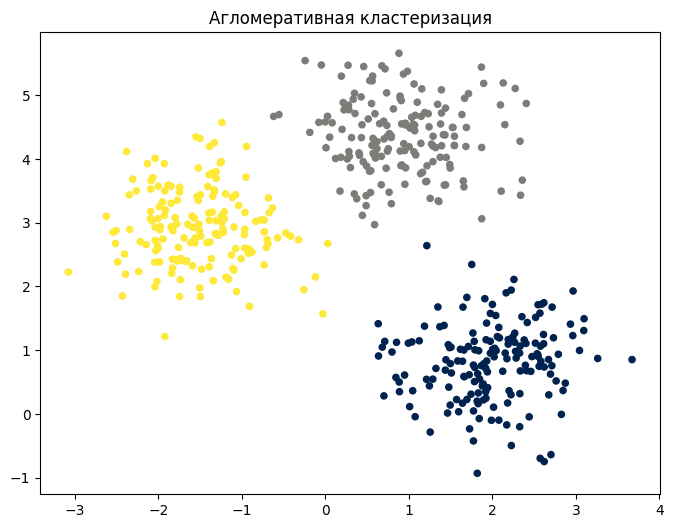

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# генерируем данные
x, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)

# создаем и обучаем модель
# мы можем задать n_clusters, если знаем, сколько кластеров хотим получить
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(x)

# визуализируем результат
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_agg, s=20, cmap='cividis')
plt.title("Агломеративная кластеризация")
plt.show()